**Introduction**:
The outbreak of COVID-19 has posed significant challenges to healthcare systems worldwide. Accurate and timely diagnosis of COVID-19 is crucial for effective treatment and containment of the disease. In this project, we aim to develop a machine learning model that can predict the diagnosis of COVID-19 based on symptoms reported by individuals. By leveraging the power of data analysis and machine learning techniques, we strive to provide a tool that can assist medical professionals in making informed decisions and optimizing healthcare resources.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# New Section

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving corona_tested_006.csv to corona_tested_006.csv


In [128]:
#reading data
corona = pd.read_csv('corona_tested_006.csv')
corona.head()

<ipython-input-128-6c658add95ca>:2: DtypeWarning:

Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11/3/2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11/3/2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11/3/2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11/3/2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11/3/2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


**Exploratory Data Analysis**

---



Although there are many definations for EDA,we want you to understand the objective of performing EDA.

Through EDA we get answers for a few questions before getting started with the data cleaning and building statistical models.

The questions we need to answers through EDA could be,

What are the basic traits of the dataset we are going to work on? ex: it's shape, datatypes, description, uniqueness, size, missing values.

Is the data sufficient? the reason for this question is some algorithms need good amount of data to produce efficient results?

do the Independent variables have any relationship between them? ex: multicolinearlity, how strong are they related to target variable?

What can we deduce from each of the variables(through visuals)?

What can we deduce from the relationship between each of the variables(multivariate analysis)?

lastly, the type and complexity of the dataset.

In [129]:
corona.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11/3/2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11/3/2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11/3/2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11/3/2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11/3/2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [130]:
corona.shape

(278848, 11)

In [131]:
corona.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [132]:
nan_values = corona.isna().sum()
print(nan_values)

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64


In [133]:
corona.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [134]:
corona.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [135]:
corona['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [136]:
corona['Fever'].value_counts()

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [137]:
corona['Sore_throat'].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [138]:
corona['Shortness_of_breath'].value_counts()


False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

In [139]:
corona['Headache'].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [140]:
corona['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [141]:
corona['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [142]:
corona['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [143]:
corona['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [144]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


<Axes: >

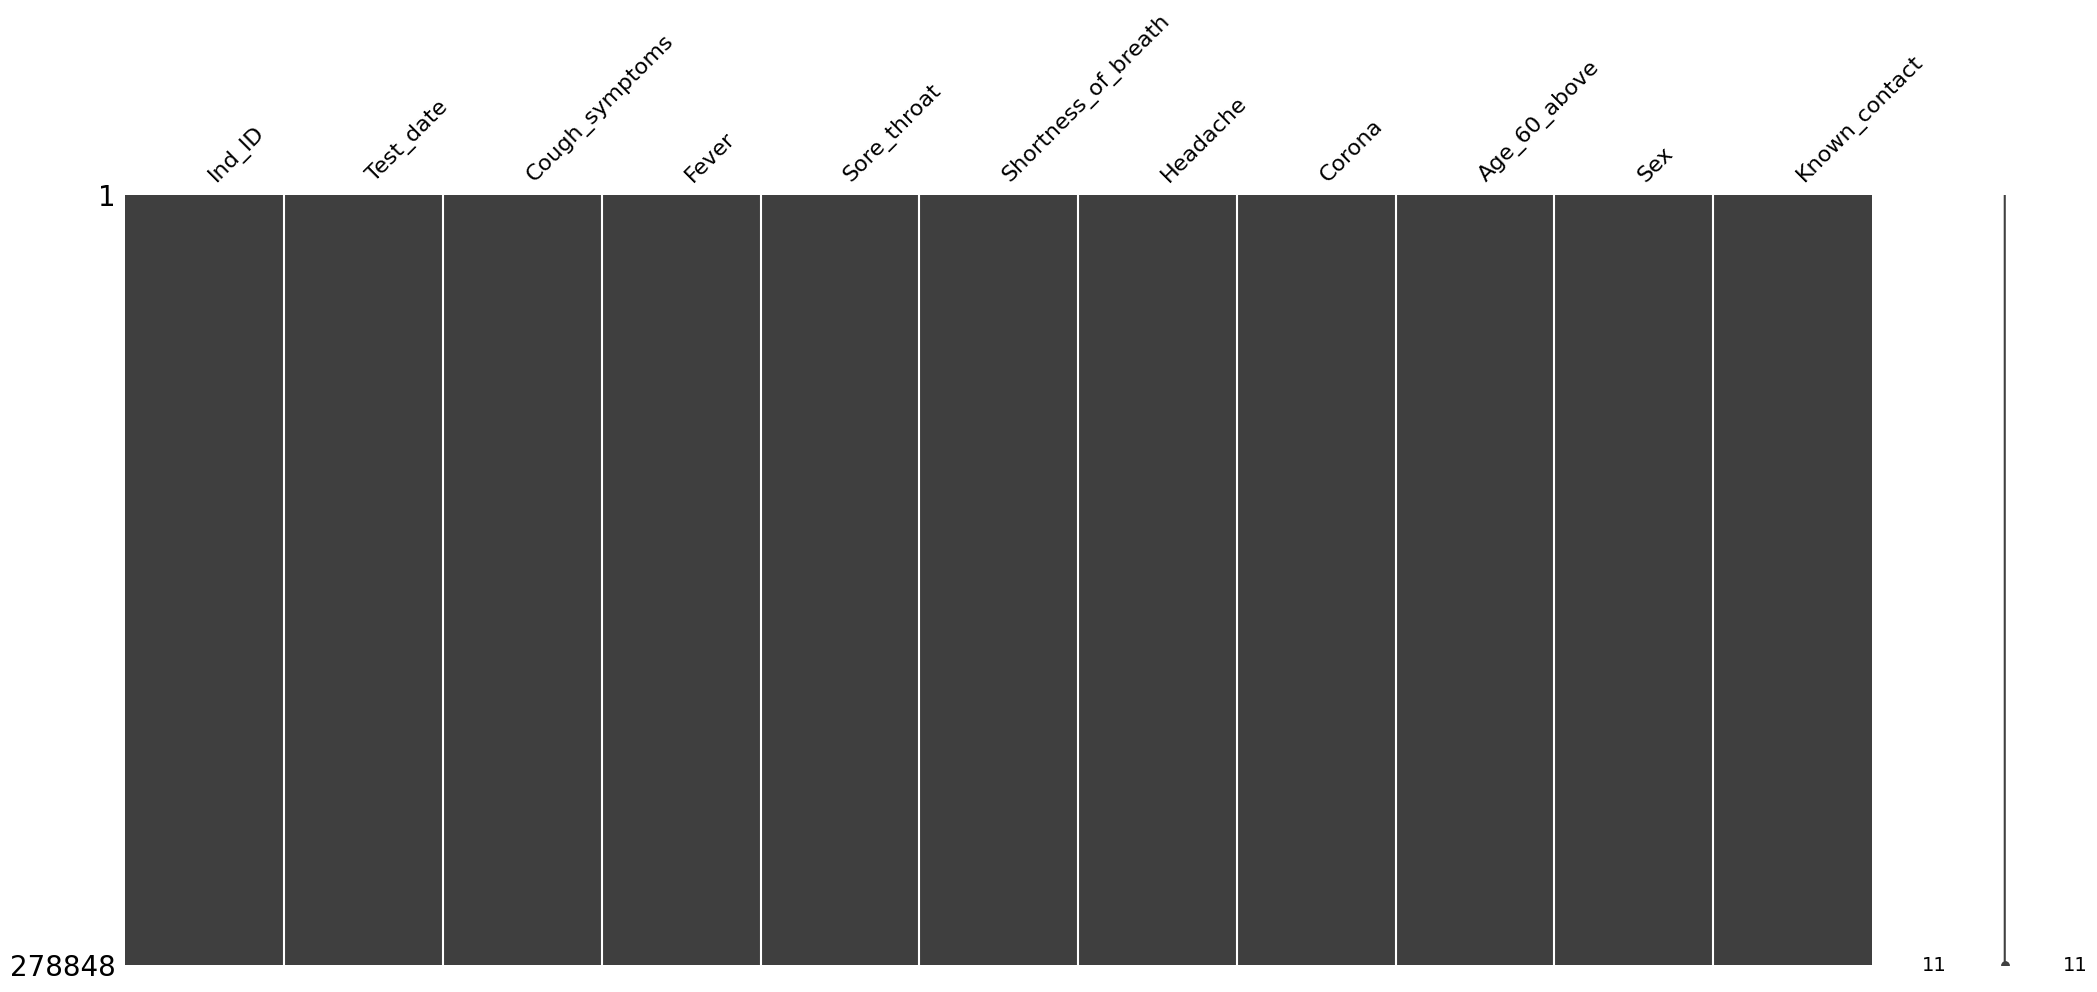

In [145]:
# Let's check the presence of missing values using missingno.
from matplotlib import pyplot as plt
import missingno as msno
msno.matrix(corona)

We can be certain that we have no missing values in the dataset after viewing the above plot

In [146]:
corona.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [147]:
corona.describe(include = 'all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
corona["Corona"].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

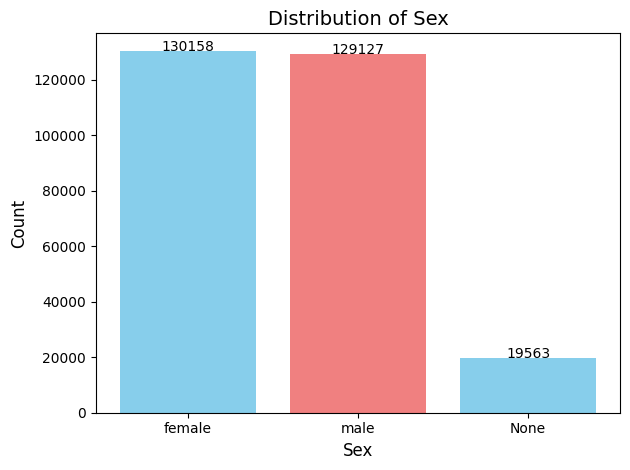

In [149]:
import matplotlib.pyplot as plt
sex_counts = corona['Sex'].value_counts()
colors = ['skyblue', 'lightcoral']
fig, ax = plt.subplots()
ax.bar(x=sex_counts.index, height=sex_counts.values, color=colors)
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Sex', fontsize=14)
#ax.tick_params(axis='x', labelrotation=45, labelsize=10)
#ax.tick_params(axis='y', labelsize=10)
#ax.grid(axis='y', linestyle='--', alpha=0.5)
for i, count in enumerate(sex_counts.values):
    ax.text(i, count + 10, str(count), ha='center', fontsize=10)
fig.tight_layout()
plt.show()


Upon analyzing the graph, it becomes evident that the count of females surpasses that of males.

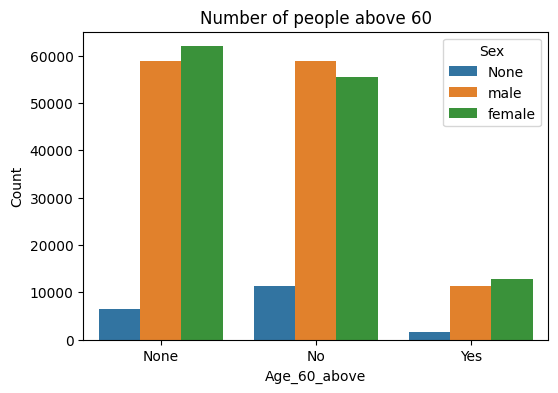

In [150]:
plt.figure(figsize=(6,4))
sns.countplot(x ='Age_60_above', data = corona, hue ='Sex', )
plt.ylabel('Count')
plt.title('Age')
plt.title('Number of people above 60')
plt.show()


from the graph we can say age_above _60 will less.

In [151]:
corona.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [152]:
# Checking the count of
fig=px.bar(corona.Test_date.value_counts().reset_index().rename(columns={'index':'Test_date','Test_date':'Count'}),x='Test_date',y='Count',color='Test_date',text='Count')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.update_layout(title_x=0.5,title_text='<b>total number of corona test')

from this graph we can say max testing was done on 20-04-2020

In [153]:
corona.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11/3/2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11/3/2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11/3/2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11/3/2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11/3/2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


**Feature Engineering** - It is the process of transforming the features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data.
It includes feature creation, Feature scaling,feature extraction and feature selection.

In [154]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

columns_to_process = ['Cough_symptoms', 'Fever', 'Headache', 'Shortness_of_breath', 'Sore_throat', 'Age_60_above', 'Sex', 'Known_contact']

# Step 1: Convert non-string columns to string type
corona[columns_to_process] = corona[columns_to_process].astype(str)

# Step 2: Convert values to lowercase and replace 'none' with NaN
for column in columns_to_process:
    corona[column] = corona[column].str.lower()
    corona[column].replace('None', np.nan, inplace=True)
    corona[column].replace('none', np.nan, inplace=True)
    corona[column].replace('other', np.nan, inplace=True)

# Step 3: Fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
corona[columns_to_process] = imputer.fit_transform(corona[columns_to_process])

# Step 4: Apply encoding to categorical columns
label_encoder = LabelEncoder()
for column in columns_to_process:
    corona[column] = label_encoder.fit_transform(corona[column])


In [155]:
import pandas as pd

corona = corona[corona['Corona'] != 'other']

# Print the updated value counts
print(corona['Corona'].value_counts())


negative    260227
positive     14729
Name: Corona, dtype: int64


Corona column is a dependent variable and some missing values in form of other so its better to drop 'other' column from our dataframe.

In [156]:
import pandas as pd

# Assuming 'corona' is the name of your DataFrame
corona['Corona'] = corona['Corona'].replace({'negative': 0, 'positive': 1})

# Print the updated value counts
print(corona['Corona'].value_counts())

0    260227
1     14729
Name: Corona, dtype: int64


In [157]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Step 1: Select only numeric columns for VIF calculation
numeric_columns = corona.select_dtypes(include=[np.number]).columns
corona_numeric = corona[numeric_columns]

# Step 2: Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data["feature"] = corona_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(corona_numeric.values, i)
                   for i in range(len(corona_numeric.columns))]

print(vif_data)




               feature       VIF
0               Ind_ID  1.676342
1       Cough_symptoms  1.485211
2                Fever  1.432058
3          Sore_throat  1.181319
4  Shortness_of_breath  1.101299
5             Headache  1.260539
6               Corona  1.830262
7         Age_60_above  1.052347
8                  Sex  1.672014
9        Known_contact  1.557261


Based on the calculated Variance Inflation Factors (VIF), we can draw the following conclusions:
VIF analysis shows no severe multicollinearity. Low VIF values indicate independent features. Proceed confidently with predictive modeling, minimal risk of inflated errors.

In [158]:
corona['Cough_symptoms'].value_counts()

0    233385
1     41571
Name: Cough_symptoms, dtype: int64

In [159]:
corona['Fever'].value_counts()

0    253581
1     21375
Name: Fever, dtype: int64

In [160]:
corona['Sore_throat'].value_counts()

0    273064
1      1892
Name: Sore_throat, dtype: int64

In [161]:
corona['Shortness_of_breath'].value_counts()

0    273407
1      1549
Name: Shortness_of_breath, dtype: int64

In [162]:
corona['Headache'].value_counts()

0    272573
1      2383
Name: Headache, dtype: int64

In [163]:
corona['Age_60_above'].value_counts()

0    249531
1     25425
Name: Age_60_above, dtype: int64

In [164]:
corona['Sex'].value_counts()

0    147586
1    127370
Name: Sex, dtype: int64

In [165]:
corona['Known_contact'].value_counts()

0    264478
1     10478
Name: Known_contact, dtype: int64

In [166]:
corona['Corona'].value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [167]:
corona.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,0,0,0,0,0,1,0,1,0
278844,278845,30-04-2020,0,0,0,0,0,0,0,0,0
278845,278846,30-04-2020,0,0,0,0,0,0,0,1,0
278846,278847,30-04-2020,0,0,0,0,0,0,0,1,0
278847,278848,30-04-2020,0,0,0,0,0,0,0,0,0


In [ ]:
'''Assuming you have a DataFrame called 'corona' with the encoded values

columns_to_decode = ['Cough_symptoms', 'Fever', 'Headache', 'Shortness_of_breath', 'Sore_throat', 'Age_60_above', 'Sex', 'Known_contact']

# Step 1: Define the mapping of encoded values to their corresponding categories
mapping = {
    'Cough_symptoms': {0: 'FALSE', 1: 'TRUE'},
    'Fever': {0: 'FALSE', 1: 'TRUE'},
    'Headache': {0: 'FALSE', 1: 'TRUE'},
    'Shortness_of_breath': {0: 'FALSE', 1: 'TRUE'},
    'Sore_throat': {0: 'FALSE', 1: 'TRUE'},
    'Age_60_above': {0: 'FALSE', 1: 'TRUE'},
    'Sex': {0: 'Female', 1: 'Male'},
    'Known_contact': {0: 'Other', 1: 'Abroad', 2: 'Contact with confirmed'}
}

# Step 2: Loop through the columns to decode the encoded values
for column in columns_to_decode:
    corona[column] = corona[column].map(mapping[column])

# Step 3: Check the resulting DataFrame with categorical values
print(corona.head())'''


   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache  Corona Age_60_above     Sex Known_contact  
0    FALSE       0        FALSE  Female         Other  
1    FALSE       1        FALSE  Female         Other  
2    FALSE       1        FALSE  Female         Other  
3    FALSE       0        FALSE  Female         Other  
4    FALSE       0        FALSE  Female        Abroad  


In [126]:
corona.tail()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
278843,30-04-2020,0,0,0,0,0,1,1
278844,30-04-2020,0,0,0,0,0,0,0
278845,30-04-2020,0,0,0,0,0,0,1
278846,30-04-2020,0,0,0,0,0,0,1
278847,30-04-2020,0,0,0,0,0,0,0


In [ ]:
'''Step 4: Define the mapping for the 'Corona' column
corona_mapping = {0: 'Negative', 1: 'Positive'}

# Step 5: Map the encoded values to their corresponding categories
corona['Corona'] = corona['Corona'].map(corona_mapping)'''


In [127]:
corona.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
0,11/3/2020,1,0,1,0,0,0,0
1,11/3/2020,0,1,0,0,0,1,0
2,11/3/2020,0,1,0,0,0,1,0
3,11/3/2020,1,0,0,0,0,0,0
4,11/3/2020,1,0,0,0,0,0,0


In [ ]:
corona['Cough_symptoms'].value_counts()

0    253215
1     21741
Name: Cough_symptoms, dtype: int64

In [ ]:
corona['Fever'].value_counts()

0    263367
1     11589
Name: Fever, dtype: int64

In [ ]:
corona['Sore_throat'].value_counts()

0    273783
1      1173
Name: Sore_throat, dtype: int64

In [ ]:
corona['Shortness_of_breath'].value_counts()

0    273872
1      1084
Name: Shortness_of_breath, dtype: int64

In [ ]:
!pip install fancyimpute

In [183]:
corona.shape

(274956, 8)

In [ ]:
'''from google.colab import files

# Save the modified data to a CSV file
corona.to_csv('modify_file.csv', index=False)

# Download the CSV file
files.download('modify_file.csv')'''


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-187-cacce15b47e0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



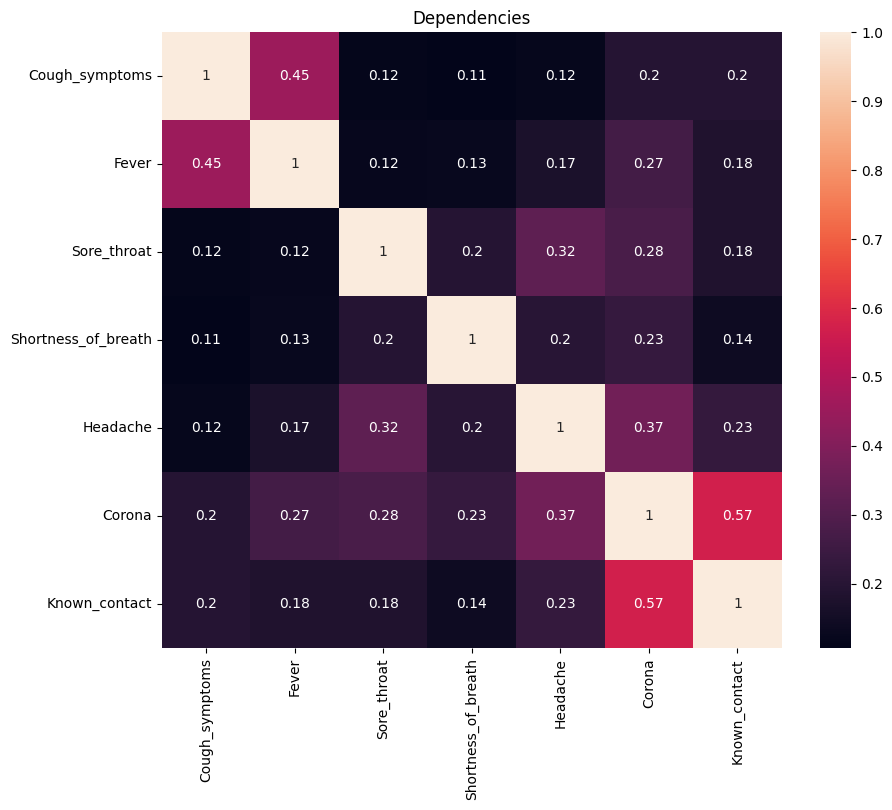

In [187]:
corr = corona.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.title("Dependencies")
plt.show()

from the graph we can see ind_id, sex, age_60_above is not much effected corona, so we can drop it.

In [ ]:
corona = corona.drop(['Ind_ID', 'Sex','Age_60_above'], axis=1)

# Print the updated columns of the corona DataFrame
print(corona.columns)

In [188]:
corona['Test_date'] = pd.to_datetime(corona['Test_date'])

In [189]:
corona['Test_date'].dtypes

dtype('<M8[ns]')

In [190]:
corona.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,2020-11-03,1,0,1,0,0,0,0
1,2020-11-03,0,1,0,0,0,1,0
2,2020-11-03,0,1,0,0,0,1,0
3,2020-11-03,1,0,0,0,0,0,0
4,2020-11-03,1,0,0,0,0,0,1


In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Splitting the dataset into training + validation and test sets
trainval_set = corona[corona['Test_date'] <= '2020-04-15']
test_set = corona[corona['Test_date'] >= '2020-04-16']

# Splitting the training + validation set into training and validation sets
train_set, val_set = train_test_split(trainval_set, test_size=0.2, random_state=42)

# Printing the shapes of the divided datasets
print("Training set shape:", train_set.shape)
print("Validation set shape:", val_set.shape)
print("Test set shape:", test_set.shape)



Training set shape: (87547, 8)
Validation set shape: (21887, 8)
Test set shape: (165522, 8)


In [191]:
# Divide the training set into X_train and y_train
X_train = train_set.drop(['Test_date', 'Corona'], axis=1)
y_train = train_set['Corona']

# Divide the validation set into X_val and y_val
X_val = val_set.drop(['Test_date', 'Corona'], axis=1)
y_val = val_set['Corona']

# Divide the test set into X_test and y_test
X_test = test_set.drop(['Test_date', 'Corona'], axis=1)
y_test = test_set['Corona']

# Print the shapes of the divided datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (87547, 6)
y_train shape: (87547,)
X_val shape: (21887, 6)
y_val shape: (21887,)
X_test shape: (165522, 6)
y_test shape: (165522,)


In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=20000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for model_name, model in models.items():
    model.fit(X_train, y_train.values.ravel())

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Performance of Validation set
    model_val_accuracy = accuracy_score(y_val, y_val_pred)
    model_val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    model_val_precision = precision_score(y_val, y_val_pred, average='weighted')
    model_val_recall = recall_score(y_val, y_val_pred, average='weighted')

    # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')

    # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')

    print(model_name)
    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))
    print('----------------------------------')
    print('Model performance for Validation set')
    print('- Accuracy: {:.2f}'.format(model_val_accuracy))
    print('- F1 score: {:.2f}'.format(model_val_f1))
    print('- Precision: {:.2f}'.format(model_val_precision))
    print('- Recall: {:.2f}'.format(model_val_recall))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy))
    print('- F1 score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))
    print('=' * 30)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.97
- F1 score: 0.965076
- Precision: 0.964143
- Recall: 0.966601
----------------------------------
Model performance for Validation set
- Accuracy: 0.97
- F1 score: 0.96
- Precision: 0.96
- Recall: 0.97
----------------------------------
Model performance for Test set
- Accuracy: 0.96
- F1 score: 0.96
- Precision: 0.96
- Recall: 0.96


Decision Tree
Model performance for Training set
- Accuracy: 0.97
- F1 score: 0.965280
- Precision: 0.964363
- Recall: 0.966772
----------------------------------
Model performance for Validation set
- Accuracy: 0.97
- F1 score: 0.96
- Precision: 0.96
- Recall: 0.97
----------------------------------
Model performance for Test set
- Accuracy: 0.96
- F1 score: 0.96
- Precision: 0.96
- Recall: 0.96


Random Forest
Model performance for Training set
- Accuracy: 0.97
- F1 score: 0.965297
- Precision: 0.964385
- Recall: 0.966772
----------------------------------
Model performance for Valid

**Conclusion**-Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM) show consistent and good performance across the training, validation, and test sets.

K-Nearest Neighbors (KNN) performs reasonably well but lags behind the other models in accuracy and F1 score.

The models are not overfitting as their performance on the validation set is close to the test set's performance.

Based on these results, any of the first four models (Logistic Regression, Decision Tree, Random Forest, or SVM) can be considered as suitable choices for this task. However, if computational efficiency is a concern, Logistic Regression or Decision Tree may be preferable over SVM. Further exploration or fine-tuning may be needed to achieve even better performance or consider other factors such as model interpretability and deployment considerations.








1.Find the number of corona patients who faced shortness of breath.

select count(*) as numberofpatients from sheet1 where Corona = 'positive' and shortnessofbreath ='True';

2.Find the number of negative corona patients who have fever and sore_throat.

select count(*) from sheet1 where Corona = 'Negative' and Fever = 'True' and sorethroat = 'True';


3.Group the data by month and rank the number of positive cases.

select extract(month from str_to_date(Testdate, '%m/%d/%y')) as month, count(*) as positivecase ,
RANK() OVER (order by count(*) desc) as caserank from sheet1 where corona = 'positive' group by
extract(month from str_to_date(Testdate, '%m/%d/%y')) order by month;



4.Find the female negative corona patients who faced cough and headache.

select * from sheet1 where corona ='negative' and coughsymptoms = 'True' AND headache ='True'
 and sex = 'female';




5.How many elderly corona patients have faced breathing problems? 5.How many elderly corona patients have faced breathing problems?
select count(*) from sheet1 where corona  = 'positive' and age60above = 'True' and shortnessofbreath = 'True';





6.Which three symptoms were more common among COVID positive patients?
select symptom, count(*) as symptomcount from (select 'coughsymptoms' as symptom from sheet1 where corona = 'positive' and coughsymptoms = 'True'
union all
select 'fever' as symptom from sheet1 where corona ='positive' and fever = 'true'
union all
select 'shortnessofbreath' as symptom from sheet1 where corona ='positive' and shortnessofbreath = 'true'
union all
select 'sorethroat' as symptom from sheet1 where corona ='positive' and sorethroat = 'true'
union all
select 'headache' as symptom from sheet1 where corona ='positive' and headache = 'true') as symptoms
group by symptom
order by symptomcount desc
limit 3;



7.Which symptom was less common among COVID negative people?

select symptom, count(*) as symptomcount from (select 'coughsymptoms' as symptom from sheet1 where corona = 'positive' and coughsymptoms = 'True'
union all
select 'fever' as symptom from sheet1 where corona ='negative' and fever = 'true'
union all
select 'shortnessofbreath' as symptom from sheet1 where corona ='negative' and shortnessofbreath = 'true'
union all
select 'sorethroat' as symptom from sheet1 where corona ='negativee' and sorethroat = 'true'
union all
select 'headache' as symptom from sheet1 where corona ='negative' and headache = 'true') as symptoms
group by symptom
order by symptomcount asc
limit 1;



8.What are the most common symptoms among COVID positive males whose known contact was abroad?
WITH symptom_counts AS (
    SELECT 'Coughsymptoms' AS symptom, COUNT(*) AS symptomcount
    FROM sheet1
    WHERE corona = 'positive' AND sex = 'male' AND knowncontact = 'abroad' AND coughsymptoms = 'true'
    UNION ALL
    SELECT 'Fever' AS symptom, COUNT(*) AS symptomcount
    FROM sheet1
    WHERE corona = 'positive' AND sex = 'male' AND knowncontact = 'abroad' AND fever = 'true'
    UNION ALL
    SELECT 'Sorethroat' AS symptom, COUNT(*) AS symptomcount
    FROM sheet1
    WHERE corona = 'positive' AND sex = 'male' AND knowncontact = 'abroad' AND sorethroat = 'true'
    UNION ALL
    SELECT 'Headache' AS symptom, COUNT(*) AS symptomcount
    FROM sheet1
    WHERE corona = 'positive' AND sex = 'male' AND knowncontact = 'abroad' AND headache = 'true'
)
SELECT symptom, MAX(symptomcount) AS max_count
FROM symptom_counts
GROUP BY symptom
ORDER BY max_count DESC
LIMIT 1;
